In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT

In [3]:
include("../src/model-35/likelihood.jl")
include("../src/model-35/utill_model.jl")
include("../src/utill.jl")

plot_projections (generic function with 1 method)

In [4]:
conv_mat = load("../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"],
);


In [9]:
# images = load("../data/experiment/dataset_2/m2/images.jld2");

# event_number = 1

# event = (
#     cam_1 = images["cam_1"][event_number,:,:],
#     cam_2 = images["cam_2"][event_number,:,:],
#     cam_3 = images["cam_3"][event_number,:,:],
#     cam_4 = images["cam_4"][event_number,:,:],
#     population = images["charge"][event_number,:][1],
# )

param_truth = (
    tr_size = [0.1351391194426739, 0.1277157833399047], 
    ang_spr = [3.620311373345319, 4.596231074191319], 
    waist = [2.949969621354337], 
    algmx = [37.051704685415324, 37.63003902667197, 20.920016925948314, 34.159376038414216], 
    algmy = [34.04464267822592, 35.42312405029282, 21.854675332973876, 34.946852161511934], 
    cam4_ped = 32.76746738860242, 
    cam4_light_fluct = 2.3584366502779224, 
    cam4_light_amp = 7.527183033503572, 
    resx = [0.8923471586553853, 0.2192435128954407, 0.28744674303351203], 
    resy = [3.2316259755956955, 0.2321945270280869, 0.9752378790467492], 
    cam4_resx = 6.176013742799997, 
    cam4_resy = 4.681177497724568, 
    psx = [26.79969254750247, 21.681081786395985, 114.35309491258872], 
    psy = [29.85965676996567, 23.758827454858725, 126.26792746156742], 
    cam4_psx = 122.14706355870263, 
    cam4_psy = 119.61241807897316, 
    light_amp = [6.962137966990794, 10.1163010761233, 2.294556202527316], 
    s_cam = [0.0, 1.478, 15.026, 23.115]
    );

In [10]:
event = generate_event(param_truth, 26.8, conv_matrices)

(cam_1 = [203.0 2.0 … 42.0 179.0; 15.0 1.0 … 5.0 11.0; … ; 2.0 13.0 … 0.0 110.0; 13.0 1.0 … 0.0 12.0], cam_2 = [7.0 4.0 … 3.0 5.0; 0.0 0.0 … 2.0 3.0; … ; 109.0 2.0 … 0.0 1.0; 0.0 1.0 … 2.0 3.0], cam_3 = [55.0 0.0 … 21.0 136.0; 2.0 10.0 … 3.0 3.0; … ; 9.0 4.0 … 3.0 0.0; 15.0 16.0 … 253.0 1.0], cam_4 = [46.0 28.0 … 39.0 45.0; 18.0 62.0 … 24.0 24.0; … ; 35.0 24.0 … 47.0 40.0; 41.0 36.0 … 31.0 34.0], population = 26.8)

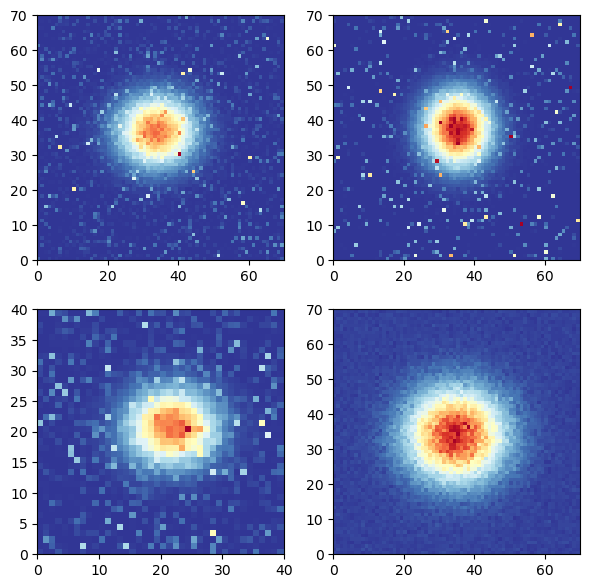

PyObject <matplotlib.collections.QuadMesh object at 0x7f62eadceca0>

In [11]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")